In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

In [2]:

# pip install openpyxl

In [3]:
df=pd.read_excel("C://Users//DanukaDilshanRathnay//Desktop//AI-Driven-Job-Role-Fit-Prediction//Merge_data_new.xlsx")
df.head()

,EmployeeCode,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Gender,Age,Department,JobCategory,Designation,...,Employee Rejoined,Current Role,KPI,Absentism Rate,Employee Satisfaction Score,Experience in Years Previous Positions,Total Experience in Years,Number of Goal Assigned,Number of Goals Achieved,Employee Score Based on Goals
0,EMP1001,0.292466,0.231446,0.329284,0.344153,Male,26,Data Science & AI,Data Science & AI,AI Engineer Specialist,...,No,AI Engineer,75.6,2.4,10.8,0.2,4.0,18,0,34.7
1,EMP1005,0.097209,0.106986,0.311831,0.555293,Female,42,Software Engineering,Software Engineering,Frontend Developer Specialist,...,No,Frontend Developer,66.8,3.3,6.3,14.4,17.7,19,17,108.9
2,EMP1012,0.072601,-0.008218,0.478025,0.526082,Male,46,Software Engineering,Software Engineering,DevOps Engineer Specialist,...,Yes,DevOps Engineer,73.3,2.7,8.9,10.7,18.2,8,6,106.6
3,EMP1026,0.120334,0.140910,0.311831,0.471978,Male,38,Software Engineering,Software Engineering,Frontend Developer Specialist,...,No,Frontend Developer,72.1,2.8,7.9,0.1,3.2,8,4,51.2
4,EMP1028,0.033789,0.058121,0.400937,0.378987,Female,44,Software Engineering,Software Engineering,DevOps Engineer Specialist,...,Yes,DevOps Engineer,82.0,1.8,8.2,2.3,7.9,8,5,73.3


In [4]:
df.columns

Index(['EmployeeCode', 'Technical Score_JD', 'Programming Score_JD',
       'Soft Score_with_JD', 'Education_match_Score_with_JD', 'Gender', 'Age',
       'Department', 'JobCategory', 'Designation', 'JobLevel',
       'ProficiencyLevel', 'Education Qualifications',
       'Professional Qualifications With Years', 'Date of Joining',
       'Years of Experience in Company', 'Handled Projects',
       'Disciplinary Actions (Yes/No)', 'Type of Disciplinary Action',
       'Promoted Before', 'Employee Rejoined', 'Current Role', 'KPI',
       'Absentism Rate', 'Employee Satisfaction Score',
       'Experience in Years Previous Positions', 'Total Experience in Years',
       'Number of Goal Assigned', 'Number of Goals Achieved',
       'Employee Score Based on Goals'],
      dtype='object')

In [5]:
df.head()

,EmployeeCode,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Gender,Age,Department,JobCategory,Designation,...,Employee Rejoined,Current Role,KPI,Absentism Rate,Employee Satisfaction Score,Experience in Years Previous Positions,Total Experience in Years,Number of Goal Assigned,Number of Goals Achieved,Employee Score Based on Goals
0,EMP1001,0.292466,0.231446,0.329284,0.344153,Male,26,Data Science & AI,Data Science & AI,AI Engineer Specialist,...,No,AI Engineer,75.6,2.4,10.8,0.2,4.0,18,0,34.7
1,EMP1005,0.097209,0.106986,0.311831,0.555293,Female,42,Software Engineering,Software Engineering,Frontend Developer Specialist,...,No,Frontend Developer,66.8,3.3,6.3,14.4,17.7,19,17,108.9
2,EMP1012,0.072601,-0.008218,0.478025,0.526082,Male,46,Software Engineering,Software Engineering,DevOps Engineer Specialist,...,Yes,DevOps Engineer,73.3,2.7,8.9,10.7,18.2,8,6,106.6
3,EMP1026,0.120334,0.140910,0.311831,0.471978,Male,38,Software Engineering,Software Engineering,Frontend Developer Specialist,...,No,Frontend Developer,72.1,2.8,7.9,0.1,3.2,8,4,51.2
4,EMP1028,0.033789,0.058121,0.400937,0.378987,Female,44,Software Engineering,Software Engineering,DevOps Engineer Specialist,...,Yes,DevOps Engineer,82.0,1.8,8.2,2.3,7.9,8,5,73.3


In [6]:
df.isnull().sum()


EmployeeCode                                0
Technical Score_JD                          0
Programming Score_JD                        0
Soft Score_with_JD                          0
Education_match_Score_with_JD               0
Gender                                      0
Age                                         0
Department                                  0
JobCategory                                 0
Designation                                 0
JobLevel                                    0
ProficiencyLevel                            0
Education Qualifications                    0
Professional Qualifications With Years      0
Date of Joining                             0
Years of Experience in Company              0
Handled Projects                            0
Disciplinary Actions (Yes/No)               0
Type of Disciplinary Action               262
Promoted Before                             0
Employee Rejoined                           0
Current Role                      

In [7]:
df["Type of Disciplinary Action"].replace(np.nan,"No",inplace=True)

C:\Users\DanukaDilshanRathnay\AppData\Local\Temp\ipykernel_3316\3297289806.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Type of Disciplinary Action"].replace(np.nan,"No",inplace=True)


In [8]:
df.rename(columns={'Years of Experience in Company' : 'Years of Experience in this Company'},inplace=True)

In [9]:
df["Goals are achived_ratio"]=round((df["Number of Goals Achieved"]/df["Number of Goal Assigned"]),2)

In [10]:
df.isnull().sum()

EmployeeCode                              0
Technical Score_JD                        0
Programming Score_JD                      0
Soft Score_with_JD                        0
Education_match_Score_with_JD             0
Gender                                    0
Age                                       0
Department                                0
JobCategory                               0
Designation                               0
JobLevel                                  0
ProficiencyLevel                          0
Education Qualifications                  0
Professional Qualifications With Years    0
Date of Joining                           0
Years of Experience in this Company       0
Handled Projects                          0
Disciplinary Actions (Yes/No)             0
Type of Disciplinary Action               0
Promoted Before                           0
Employee Rejoined                         0
Current Role                              0
KPI                             

In [11]:
df.head()

,EmployeeCode,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Gender,Age,Department,JobCategory,Designation,...,Current Role,KPI,Absentism Rate,Employee Satisfaction Score,Experience in Years Previous Positions,Total Experience in Years,Number of Goal Assigned,Number of Goals Achieved,Employee Score Based on Goals,Goals are achived_ratio
0,EMP1001,0.292466,0.231446,0.329284,0.344153,Male,26,Data Science & AI,Data Science & AI,AI Engineer Specialist,...,AI Engineer,75.6,2.4,10.8,0.2,4.0,18,0,34.7,0.00
1,EMP1005,0.097209,0.106986,0.311831,0.555293,Female,42,Software Engineering,Software Engineering,Frontend Developer Specialist,...,Frontend Developer,66.8,3.3,6.3,14.4,17.7,19,17,108.9,0.89
2,EMP1012,0.072601,-0.008218,0.478025,0.526082,Male,46,Software Engineering,Software Engineering,DevOps Engineer Specialist,...,DevOps Engineer,73.3,2.7,8.9,10.7,18.2,8,6,106.6,0.75
3,EMP1026,0.120334,0.140910,0.311831,0.471978,Male,38,Software Engineering,Software Engineering,Frontend Developer Specialist,...,Frontend Developer,72.1,2.8,7.9,0.1,3.2,8,4,51.2,0.50
4,EMP1028,0.033789,0.058121,0.400937,0.378987,Female,44,Software Engineering,Software Engineering,DevOps Engineer Specialist,...,DevOps Engineer,82.0,1.8,8.2,2.3,7.9,8,5,73.3,0.62


In [12]:
df.columns

Index(['EmployeeCode', 'Technical Score_JD', 'Programming Score_JD',
       'Soft Score_with_JD', 'Education_match_Score_with_JD', 'Gender', 'Age',
       'Department', 'JobCategory', 'Designation', 'JobLevel',
       'ProficiencyLevel', 'Education Qualifications',
       'Professional Qualifications With Years', 'Date of Joining',
       'Years of Experience in this Company', 'Handled Projects',
       'Disciplinary Actions (Yes/No)', 'Type of Disciplinary Action',
       'Promoted Before', 'Employee Rejoined', 'Current Role', 'KPI',
       'Absentism Rate', 'Employee Satisfaction Score',
       'Experience in Years Previous Positions', 'Total Experience in Years',
       'Number of Goal Assigned', 'Number of Goals Achieved',
       'Employee Score Based on Goals', 'Goals are achived_ratio'],
      dtype='object')

In [13]:
df_n=df.drop(columns=['Education Qualifications','Department', 'JobCategory', 'Designation',
       'Professional Qualifications With Years', 'Date of Joining','Handled Projects','Current Role','Number of Goal Assigned', 'Number of Goals Achieved','Total Experience in Years','Experience in Years Previous Positions'
       ],axis=1)

In [14]:
df_n.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeCode                         542 non-null    object 
 1   Technical Score_JD                   542 non-null    float64
 2   Programming Score_JD                 542 non-null    float64
 3   Soft Score_with_JD                   542 non-null    float64
 4   Education_match_Score_with_JD        542 non-null    float64
 5   Gender                               542 non-null    object 
 6   Age                                  542 non-null    int64  
 7   JobLevel                             542 non-null    object 
 8   ProficiencyLevel                     542 non-null    object 
 9   Years of Experience in this Company  542 non-null    float64
 10  Disciplinary Actions (Yes/No)        542 non-null    object 
 11  Type of Disciplinary Action     

In [15]:
cat=['Gender', 'JobLevel', 'ProficiencyLevel','Disciplinary Actions (Yes/No)','Type of Disciplinary Action',
     'Promoted Before', 'Employee Rejoined']
con=['Technical Score_JD', 'Programming Score_JD','Soft Score_with_JD', 'Education_match_Score_with_JD','Age'
     ,'Years of Experience in this Company','KPI', 'Absentism Rate',
       'Employee Satisfaction Score',
       'Goals are achived_ratio',
       'Employee Score Based on Goals']



In [16]:
df_n[con].head()

,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Age,Years of Experience in this Company,KPI,Absentism Rate,Employee Satisfaction Score,Goals are achived_ratio,Employee Score Based on Goals
0,0.292466,0.231446,0.329284,0.344153,26,3.8,75.6,2.4,10.8,0.00,34.7
1,0.097209,0.106986,0.311831,0.555293,42,3.3,66.8,3.3,6.3,0.89,108.9
2,0.072601,-0.008218,0.478025,0.526082,46,7.5,73.3,2.7,8.9,0.75,106.6
3,0.120334,0.140910,0.311831,0.471978,38,3.1,72.1,2.8,7.9,0.50,51.2
4,0.033789,0.058121,0.400937,0.378987,44,5.6,82.0,1.8,8.2,0.62,73.3


High correlation between Age and Employee Score Based on Goals: 0.57
High correlation between Goals are achived_ratio and Employee Score Based on Goals: 0.51
High correlation between Employee Score Based on Goals and Age: 0.57
High correlation between Employee Score Based on Goals and Goals are achived_ratio: 0.51


<Axes: >

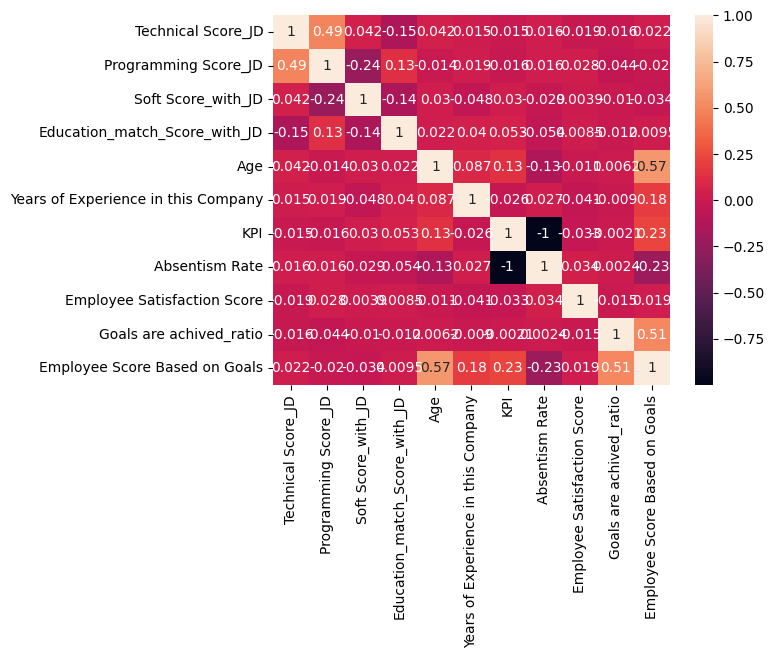

In [17]:
import seaborn as sns
corr = df_n[con].corr()
for col1 in corr.columns:
    for col2 in corr.columns:
        if col1 != col2 and corr.loc[col1, col2] > 0.5:
            print(f"High correlation between {col1} and {col2}: {corr.loc[col1, col2]:.2f}")
sns.heatmap(corr, annot=True)

In [18]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
sd=StandardScaler()
df_con = sd.fit_transform(df_n[con])
df_con = pd.DataFrame(df_con, columns=sd.get_feature_names_out(df_n[con].columns))
df_con.head()

,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Age,Years of Experience in this Company,KPI,Absentism Rate,Employee Satisfaction Score,Goals are achived_ratio,Employee Score Based on Goals
0,0.953732,0.165882,-0.423674,-1.294737,-1.413294,-0.436307,0.036036,-0.075868,2.255697,-1.672789,-1.733889
1,-0.617442,-0.489970,-0.609118,0.125122,0.007372,-0.612023,-0.835542,0.815900,-0.807580,1.142016,1.078562
2,-0.815451,-1.097048,1.156722,-0.071316,0.362538,0.863990,-0.191763,0.221388,0.962314,0.699237,0.991383
3,-0.431363,-0.311206,-0.609118,-0.435152,-0.347794,-0.682309,-0.310615,0.320473,0.281585,-0.091438,-1.108479
4,-1.127759,-0.747466,0.337646,-1.060487,0.184955,0.196270,0.669910,-0.670380,0.485804,0.288086,-0.270808


In [32]:
df_cat=pd.get_dummies(df_n[cat],dtype=int,drop_first=True)
df_cat=df_cat.astype(object)
df_cat.head()

# for col in cat:
#     df[col]=df[col].astype('category')
# df[cat].head()


,Gender_Male,JobLevel_Mid-Level,JobLevel_Senior-Level,ProficiencyLevel_Basic,ProficiencyLevel_Intermediate,Disciplinary Actions (Yes/No)_Yes,Type of Disciplinary Action_Warning,Promoted Before_Yes,Employee Rejoined_Yes
0,1,1,0,1,0,1,1,1,0
1,0,0,0,0,1,1,1,1,0
2,1,1,0,0,1,0,0,1,1
3,1,0,1,0,1,0,0,1,0
4,0,0,1,0,1,1,1,1,1


In [33]:
employee_ids = df_n['EmployeeCode']
processed_df = pd.concat([employee_ids.reset_index(drop=True), df_con, df_cat], axis=1)

In [34]:
processed_df.head()

,EmployeeCode,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Age,Years of Experience in this Company,KPI,Absentism Rate,Employee Satisfaction Score,...,Employee Score Based on Goals,Gender_Male,JobLevel_Mid-Level,JobLevel_Senior-Level,ProficiencyLevel_Basic,ProficiencyLevel_Intermediate,Disciplinary Actions (Yes/No)_Yes,Type of Disciplinary Action_Warning,Promoted Before_Yes,Employee Rejoined_Yes
0,EMP1001,0.953732,0.165882,-0.423674,-1.294737,-1.413294,-0.436307,0.036036,-0.075868,2.255697,...,-1.733889,1,1,0,1,0,1,1,1,0
1,EMP1005,-0.617442,-0.489970,-0.609118,0.125122,0.007372,-0.612023,-0.835542,0.815900,-0.807580,...,1.078562,0,0,0,0,1,1,1,1,0
2,EMP1012,-0.815451,-1.097048,1.156722,-0.071316,0.362538,0.863990,-0.191763,0.221388,0.962314,...,0.991383,1,1,0,0,1,0,0,1,1
3,EMP1026,-0.431363,-0.311206,-0.609118,-0.435152,-0.347794,-0.682309,-0.310615,0.320473,0.281585,...,-1.108479,1,0,1,0,1,0,0,1,0
4,EMP1028,-1.127759,-0.747466,0.337646,-1.060487,0.184955,0.196270,0.669910,-0.670380,0.485804,...,-0.270808,0,0,1,0,1,1,1,1,1


In [35]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeCode                         542 non-null    object 
 1   Technical Score_JD                   542 non-null    float64
 2   Programming Score_JD                 542 non-null    float64
 3   Soft Score_with_JD                   542 non-null    float64
 4   Education_match_Score_with_JD        542 non-null    float64
 5   Age                                  542 non-null    float64
 6   Years of Experience in this Company  542 non-null    float64
 7   KPI                                  542 non-null    float64
 8   Absentism Rate                       542 non-null    float64
 9   Employee Satisfaction Score          542 non-null    float64
 10  Goals are achived_ratio              542 non-null    float64
 11  Employee Score Based on Goals   

In [23]:
# processed_df.to_excel("Prepro.xlsx",index=False)

 ### FAMD-Based Feature Importance

In [36]:
df_pc=processed_df.drop(columns=["EmployeeCode"],axis=1)

df_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Technical Score_JD                   542 non-null    float64
 1   Programming Score_JD                 542 non-null    float64
 2   Soft Score_with_JD                   542 non-null    float64
 3   Education_match_Score_with_JD        542 non-null    float64
 4   Age                                  542 non-null    float64
 5   Years of Experience in this Company  542 non-null    float64
 6   KPI                                  542 non-null    float64
 7   Absentism Rate                       542 non-null    float64
 8   Employee Satisfaction Score          542 non-null    float64
 9   Goals are achived_ratio              542 non-null    float64
 10  Employee Score Based on Goals        542 non-null    float64
 11  Gender_Male                     

In [37]:
df_pc.isnull().sum()

Technical Score_JD                     0
Programming Score_JD                   0
Soft Score_with_JD                     0
Education_match_Score_with_JD          0
Age                                    0
Years of Experience in this Company    0
KPI                                    0
Absentism Rate                         0
Employee Satisfaction Score            0
Goals are achived_ratio                0
Employee Score Based on Goals          0
Gender_Male                            0
JobLevel_Mid-Level                     0
JobLevel_Senior-Level                  0
ProficiencyLevel_Basic                 0
ProficiencyLevel_Intermediate          0
Disciplinary Actions (Yes/No)_Yes      0
Type of Disciplinary Action_Warning    0
Promoted Before_Yes                    0
Employee Rejoined_Yes                  0
dtype: int64

In [90]:

import prince
famd = prince.FAMD(n_components=df_pc.shape[1], random_state=42)
famd.fit(df_pc)
eigenvalues=famd.eigenvalues_summary
print(eigenvalues)


# famd_importance = np.abs(famd.column_contributions_).iloc[:,0]  # Contribution to first component
# print(famd_importance)
# print('max',famd_importance.max())
# # Normalize feature importance scores
# famd_importance_scaled = famd_importance / famd_importance.max()

# # Store in DataFrame
# famd_importance_df = pd.DataFrame({
#     'Feature': df_clustering.columns,
#     'FAMD_Importance': famd_importance
# })

# # Sort by importance
# famd_importance_df = famd_importance_df.sort_values(by='FAMD_Importance', ascending=False)

# # Display feature importance
# print("Feature Importance using FAMD:")
# print(famd_importance_df)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              9.190        17.84%                     17.84%
1              6.906        13.41%                     31.25%
2              6.541        12.70%                     43.96%
3              4.849         9.41%                     53.37%
4              4.394         8.53%                     61.90%
5              4.288         8.33%                     70.23%
6              2.616         5.08%                     75.31%
7              2.192         4.26%                     79.56%
8              1.982         3.85%                     83.41%
9              1.569         3.05%                     86.46%
10             1.508         2.93%                     89.39%
11             1.202         2.33%                     91.72%
12             1.012         1.97%                     93.69%
13             0.983         1.91%                     95.59%
14      

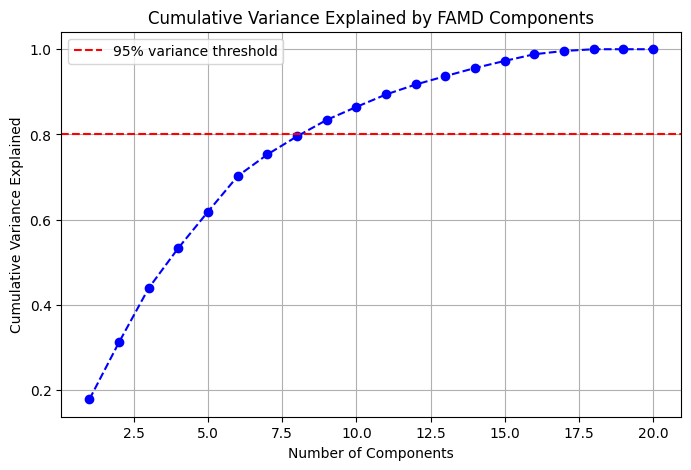

In [91]:
eigenvalues = famd.eigenvalues_
explained_variance_ratio = eigenvalues / eigenvalues.sum()

# Compute Cumulative Variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot Cumulative Variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.80, color='r', linestyle='--', label="95% variance threshold")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by FAMD Components')
plt.grid(True)
plt.legend()
plt.show()

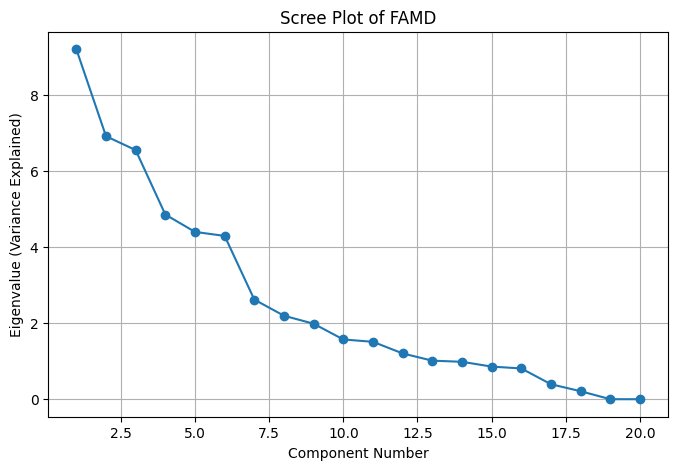

In [92]:

# Extract eigenvalues (variance explained)
explained_var = famd.eigenvalues_

# Create Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o', linestyle='-')
plt.xlabel("Component Number")
plt.ylabel("Eigenvalue (Variance Explained)")
plt.title("Scree Plot of FAMD")
plt.grid()
plt.show()

In [95]:
use_eigen=[]
for val in explained_var:
    if val>1.0:
        use_eigen.append(val)
        conunt_eig=len(use_eigen)
print(use_eigen)
print(conunt_eig)

[np.float64(9.190138577575771), np.float64(6.90600467166987), np.float64(6.541385473969872), np.float64(4.8486089605266285), np.float64(4.393548409115052), np.float64(4.287844022808767), np.float64(2.6155499258584696), np.float64(2.1921791867893554), np.float64(1.9823159995893878), np.float64(1.5688042682781251), np.float64(1.5075865837226392), np.float64(1.202073051371984), np.float64(1.012270321008103)]
13


In [118]:
components_needed = np.argmax(cumulative_variance >= 0.80) + 1
print(components_needed)

9


In [89]:

# # Extract feature contributions to the first principal component
# famd_importance = np.abs(famd.column_contributions_).iloc[:,0]  # Contribution to first component
# # print(famd.column_contributions_)
# loadings = famd.column_correlations(df_pc)
# print(loadings)
# # Normalize feature importance scores
# famd_importance_scaled = (famd_importance-famd_importance.min()) / (famd_importance.max()-famd_importance.min())

# # Store in DataFrame
# famd_importance_df = pd.DataFrame({
#     'Feature': df_pc.columns,
#     'FAMD_Importance': famd_importance_scaled
# })

# # Sort by importance
# famd_importance_df = famd_importance_df.sort_values(by='FAMD_Importance', ascending=False)

# # Display feature importance
# print("Feature Importance using FAMD:")
# print(famd_importance_df)

In [119]:
# Extract Eigenvalues
eigenvalues = famd.eigenvalues_
from sklearn.preprocessing import StandardScaler

# Extract row coordinates (Principal Component scores)
pc_scores = famd.row_coordinates(df_pc).values  # These are the PC components

# Standardize the PC scores
scaler = StandardScaler()
pc_scores_standardized = scaler.fit_transform(pc_scores)

# Perform SVD on the standardized row coordinates
U, S, VT = np.linalg.svd(pc_scores_standardized, full_matrices=False)

# Compute Loadings (Manually from SVD Decomposition)
# U, S, VT = np.linalg.svd(famd.row_coordinates(df_pc), full_matrices=False)
loadings = pd.DataFrame(VT.T, index=df_pc.columns, columns=[f'PC{i+1}' for i in range(len(S))])
selected_loadings = loadings.iloc[:, :components_needed]

print(selected_loadings)

                                          PC1           PC2           PC3  \
Technical Score_JD                   0.113953  0.000000e+00 -0.000000e+00   
Programming Score_JD                -0.305728 -2.205572e-01  9.978539e-02   
Soft Score_with_JD                  -0.247030  2.653601e-02 -1.913958e-01   
Education_match_Score_with_JD       -0.027358 -9.573414e-02 -3.389322e-01   
Age                                  0.221862 -3.115433e-02  3.837195e-02   
Years of Experience in this Company  0.021009  5.274658e-02 -1.461320e-01   
KPI                                  0.008018 -2.371204e-01 -1.044363e-02   
Absentism Rate                      -0.094874 -8.616739e-02  1.880097e-01   
Employee Satisfaction Score          0.106880 -1.046503e-01 -2.122361e-01   
Goals are achived_ratio              0.113206  3.752928e-01  1.923154e-01   
Employee Score Based on Goals        0.089824  2.250213e-01  2.214465e-01   
Gender_Male                         -0.171047  2.595476e-02  2.082729e-01   

In [153]:
def generate_pc_equations_dict(loadings_df):
    """
    Converts PCA loadings into a dictionary of formatted PC equations.

    Parameters:
    - loadings_df (pd.DataFrame): PCA loadings DataFrame with PCs as columns and features as rows.

    Returns:
    - dict: Dictionary where keys are 'PC1', 'PC2', etc., and values are properly formatted equations.
    """
    equations = {}

    for pc_name in loadings_df.columns:
        terms = []

        # Iterate through each feature's loading for the current PC
        for feature, loading in loadings_df[pc_name].items():
            if abs(loading) > 1e-4:  # Filter out near-zero coefficients
                terms.append(f"({loading:.4f}) * df_pc['{feature}']")  # Format feature name

        # Store properly formatted equation as a dictionary entry
        equations[pc_name] = " + ".join(terms)

    return equations

# Use the selected loadings DataFrame
pc_equations_dict = generate_pc_equations_dict(selected_loadings)

# Print dictionary output
print(pc_equations_dict)



{'PC1': "(0.1140) * df_pc['Technical Score_JD'] + (-0.3057) * df_pc['Programming Score_JD'] + (-0.2470) * df_pc['Soft Score_with_JD'] + (-0.0274) * df_pc['Education_match_Score_with_JD'] + (0.2219) * df_pc['Age'] + (0.0210) * df_pc['Years of Experience in this Company'] + (0.0080) * df_pc['KPI'] + (-0.0949) * df_pc['Absentism Rate'] + (0.1069) * df_pc['Employee Satisfaction Score'] + (0.1132) * df_pc['Goals are achived_ratio'] + (0.0898) * df_pc['Employee Score Based on Goals'] + (-0.1710) * df_pc['Gender_Male'] + (0.1402) * df_pc['JobLevel_Mid-Level'] + (0.1119) * df_pc['JobLevel_Senior-Level'] + (0.1158) * df_pc['ProficiencyLevel_Basic'] + (-0.1242) * df_pc['ProficiencyLevel_Intermediate'] + (-0.3808) * df_pc['Disciplinary Actions (Yes/No)_Yes'] + (0.0282) * df_pc['Type of Disciplinary Action_Warning'] + (0.0685) * df_pc['Promoted Before_Yes'] + (-0.7071) * df_pc['Employee Rejoined_Yes']", 'PC2': "(-0.2206) * df_pc['Programming Score_JD'] + (0.0265) * df_pc['Soft Score_with_JD'] + (-

In [158]:
def construct_final_equation(pc_equations, explained_variance):
    """
    Constructs the final equation using weighted principal components.

    Parameters:
    - pc_equations (dict): Dictionary of PC equations in the format {'PC1': 'PC1 = ...'}
    - explained_variance (list): List of variance explained by each PC.

    Returns:
    - str: Final equation combining all principal components with weights.
    """
    final_terms = []

    for i, variance in enumerate(explained_variance):
        pc_name = f'PC{i+1}'
        weight = f"({variance:.4f})"  # Format weight to 4 decimals
        final_terms.append(f"{weight} * {pc_name}")

    # Construct final equation
    final_equation = " + ".join(final_terms)

    return final_equation

# Example Variance Explained by Each PC (Replace with actual values)
selected_eigenvalues = eigenvalues[:components_needed] 
var=[] 
for val in selected_eigenvalues:
    x=val/sum(selected_eigenvalues)
    var.append(x)

# Example PC Equations (Already computed from previous step)
pc_equations = pc_equations_dict

# Construct final equation
final_equation = construct_final_equation(pc_equations, var)

print("Final Equation:")
print(final_equation)

Final Equation:
(0.2139) * PC1 + (0.1608) * PC2 + (0.1523) * PC3 + (0.1129) * PC4 + (0.1023) * PC5 + (0.0998) * PC6 + (0.0609) * PC7 + (0.0510) * PC8 + (0.0461) * PC9


In [149]:
employee_ids = df_n['EmployeeCode']
df_last = pd.concat([employee_ids.reset_index(drop=True), df[con], df_cat], axis=1)

In [150]:
df_last.to_excel("gg.xlsx",index=False)

In [160]:
def compute_employee_scores(df, pc_equations, explained_variance):
    """
    Computes an overall Score for each employee using principal component equations and explained variance.
    
    Parameters:
    - df (pd.DataFrame): Employee dataset.
    - pc_equations (dict): Dictionary where keys are 'PC1', 'PC2', etc., and values are PC equations.
    - explained_variance (list): List of variance explained by each PC.
    
    Returns:
    - pd.DataFrame: Updated DataFrame with computed 'Score' column.
    """
    # Ensure column names match exactly
    available_columns = set(df.columns)
    
    # Fix column mismatches dynamically
    for pc in pc_equations:
        for col in df.columns:
            pc_equations[pc] = pc_equations[pc].replace(f"df['{col}']", f"df['{col.strip()}']")

    # Compute Principal Component Scores
    pc_scores={pc: eval(pc_equations[pc]) for pc in pc_equations}

    # Convert PC scores into DataFrame
    pc_scores_df= pd.DataFrame(pc_scores, index=df.index)

    # Ensure number of PCs and variance values match
    num_computed_pcs = len(pc_scores_df.columns)
    explained_variance = explained_variance[:num_computed_pcs]  # Trim if needed

    # Compute final Score using weighted sum
    df["Score"] = sum(explained_variance[i] * pc_scores_df.iloc[:, i] for i in range(num_computed_pcs))

    return df

# Example Usage
df_add=df_last # Load employee dataset

# Example Principal Component Equations (Dynamically replace with actual values)
pc_equations = pc_equations_dict
# Example Variance Explained (Replace with actual values)
explained_variance =var

# Compute Scores
df_k =compute_employee_scores(df_last, pc_equations, explained_variance)

# Save the updated DataFrame

# Display first few rows with computed Score
df_k.head()

,EmployeeCode,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Age,Years of Experience in this Company,KPI,Absentism Rate,Employee Satisfaction Score,...,Gender_Male,JobLevel_Mid-Level,JobLevel_Senior-Level,ProficiencyLevel_Basic,ProficiencyLevel_Intermediate,Disciplinary Actions (Yes/No)_Yes,Type of Disciplinary Action_Warning,Promoted Before_Yes,Employee Rejoined_Yes,Score
0,EMP1001,0.292466,0.231446,0.329284,0.344153,26,3.8,75.6,2.4,10.8,...,1,1,0,1,0,1,1,1,0,-0.307322
1,EMP1005,0.097209,0.106986,0.311831,0.555293,42,3.3,66.8,3.3,6.3,...,0,0,0,0,1,1,1,1,0,0.482967
2,EMP1012,0.072601,-0.008218,0.478025,0.526082,46,7.5,73.3,2.7,8.9,...,1,1,0,0,1,0,0,1,1,0.22549
3,EMP1026,0.120334,0.140910,0.311831,0.471978,38,3.1,72.1,2.8,7.9,...,1,0,1,0,1,0,0,1,0,-0.03229
4,EMP1028,0.033789,0.058121,0.400937,0.378987,44,5.6,82.0,1.8,8.2,...,0,0,1,0,1,1,1,1,1,-0.076138


In [176]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
df_k['Score_sc'] = mn.fit_transform(df_k[['Score']])*100
df_k = df_k.sort_values(by='Score_sc')


In [179]:
software_eng_employees = df[df["Department"] == "Software Engineering"]["EmployeeCode"]

# Drop these employees from df_k
df_k = df_k[~df_k["EmployeeCode"].isin(software_eng_employees)]


In [182]:
df_k.shape

(250, 23)

In [183]:
df_k.to_excel("se.xlsx",index=False)